In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached importlib_metadata-6.5.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s et

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
df_train

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

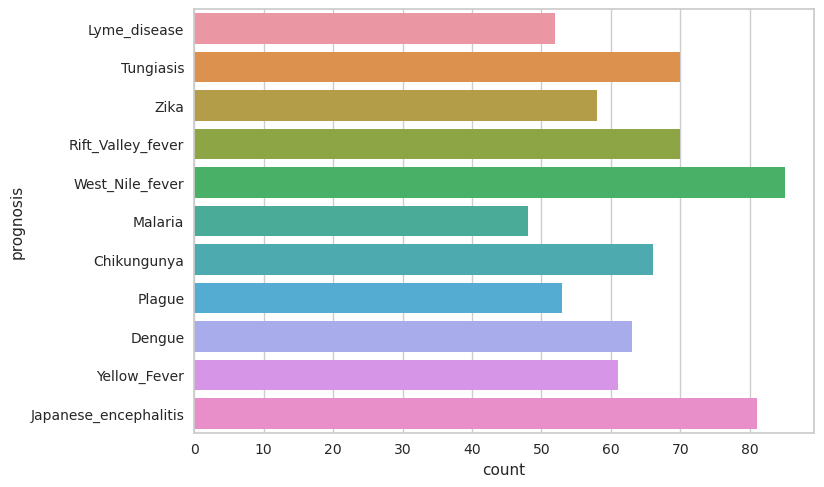

In [5]:
fig = sns.countplot(data=df_train, y='prognosis')


In [6]:
s = setup(df_train, target = 'prognosis', session_id = 123, ignore_features=['id'])

,Description,Value
0,Session id,123
1,Target,prognosis
2,Target type,Multiclass
3,Target mapping,"Chikungunya: 0, Dengue: 1, Japanese_encephalitis: 2, Lyme_disease: 3, Malaria: 4, Plague: 5, Rift_Valley_fever: 6, Tungiasis: 7, West_Nile_fever: 8, Yellow_Fever: 9, Zika: 10"
4,Original data shape,"(707, 66)"
5,Transformed data shape,"(707, 65)"
6,Transformed train set shape,"(494, 65)"
7,Transformed test set shape,"(213, 65)"
8,Ignore features,1
9,Numeric features,64


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.3298,0.7646,0.3298,0.3257,0.3109,0.2605,0.2634,20.0900
rf,Random Forest Classifier,0.3218,0.7557,0.3218,0.2920,0.2959,0.2515,0.2544,0.3820
lda,Linear Discriminant Analysis,0.3198,0.7186,0.3198,0.3084,0.2990,0.2496,0.2523,0.0600
xgboost,Extreme Gradient Boosting,0.3094,0.7425,0.3094,0.3138,0.3004,0.2388,0.2408,0.9770
lightgbm,Light Gradient Boosting Machine,0.3093,0.7432,0.3093,0.2976,0.2949,0.2381,0.2407,1.4510
ridge,Ridge Classifier,0.3058,0.0000,0.3058,0.2810,0.2721,0.2330,0.2362,0.0400
lr,Logistic Regression,0.3056,0.7185,0.3056,0.2835,0.2845,0.2339,0.2358,0.6200
et,Extra Trees Classifier,0.3013,0.7521,0.3013,0.2958,0.2857,0.2288,0.2314,0.4050
gbc,Gradient Boosting Classifier,0.2993,0.7258,0.2993,0.3073,0.2892,0.2257,0.2278,1.7270
svm,SVM - Linear Kernel,0.2815,0.0000,0.2815,0.2838,0.2646,0.2083,0.2125,0.1320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [8]:
best_tunned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.8100,0.4000,0.3751,0.3640,0.3357,0.3412
1,0.2800,0.7186,0.2800,0.3273,0.2753,0.2084,0.2129
2,0.3800,0.7473,0.3800,0.3183,0.3269,0.3148,0.3226
3,0.3200,0.7814,0.3200,0.3317,0.3147,0.2458,0.2502
4,0.3265,0.7924,0.3265,0.3325,0.3109,0.2569,0.2595
5,0.2857,0.7724,0.2857,0.2906,0.2524,0.2108,0.2138
6,0.3469,0.7655,0.3469,0.3058,0.3130,0.2784,0.2814
7,0.3673,0.7791,0.3673,0.2961,0.3229,0.3003,0.3040
8,0.3673,0.7668,0.3673,0.3030,0.3154,0.2984,0.3062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
evaluate_model(best_tunned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
ids = df_test['id']
df_test = df_test.drop('id', axis=1)

In [11]:
pred = predict_model(best_tunned, df_test, raw_score=True)
indices = np.argsort(-pred.loc[:,pred.columns[-11:]])
ind = indices.apply(lambda x: [i for i in x],axis=1)

In [12]:
col = np.array([i[17:] for i in pred.loc[2,pred.columns[-11:]].index])
result = [' '.join(x) for x in[col[row][:3] for row in ind]]

In [13]:
submission = pd.DataFrame({'id':ids,'prognosis':result})
submission.to_csv('submission.csv',index=False)